<a href="https://colab.research.google.com/github/christinaft/044_Christina-F.-T_POSTTEST2DATMIN/blob/main/044_Christina_Febriyanti_Tobing_Posttest2Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import pandas as pd

#(1) Apriori

Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

In [108]:
with open ('dataset_market_basket.txt') as file:
  raw_data = file.read()

In [109]:
data = raw_data.split('\n')

In [110]:
dataset = [item.split(",") for item in data]

In [111]:
#Ubah list of lists menjadi list tunggal
items = [item for sublist in dataset for item in sublist]

#Buat set unik dari items
unique_items = set(items)

#Hitung frekuensi tiap jenis item pada tiap baris dataset
tabular_data = []
for row in dataset:
  row_data = {}
  for item in unique_items:
    row_data[item] = row.count(item)
  tabular_data.append(row_data)

#Buat tabulasi menggunakan pandas DataFrame
df = pd.DataFrame(tabular_data)
df

,pickled vegetables,beef,root vegetables,pastry,sugar,curd,cling film/bags,whipped/sour cream,semi-finished bread,hygiene articles,yogurt,other vegetables,butter milk,salty snack,canned beer,misc. beverages,specialty chocolate,butter,rolls/buns,whole milk,frozen meals,dental care,soda,frankfurter,tropical fruit,detergent,dish cleaner,white bread,frozen vegetables,sausage
0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [112]:
df.sum()

pickled vegetables     1
beef                   1
root vegetables        1
pastry                 1
sugar                  1
curd                   1
cling film/bags        1
whipped/sour cream     1
semi-finished bread    1
hygiene articles       1
yogurt                 1
other vegetables       1
butter milk            1
salty snack            1
canned beer            1
misc. beverages        1
specialty chocolate    1
butter                 1
rolls/buns             4
whole milk             5
frozen meals           1
dental care            1
soda                   3
frankfurter            2
tropical fruit         1
detergent              1
dish cleaner           1
white bread            1
frozen vegetables      1
sausage                4
dtype: int64

In [113]:
df.columns

Index(['pickled vegetables', 'beef', 'root vegetables', 'pastry', 'sugar', 'curd', 'cling film/bags', 'whipped/sour cream', 'semi-finished bread', 'hygiene articles', 'yogurt', 'other vegetables',
       'butter milk', 'salty snack', 'canned beer', 'misc. beverages', 'specialty chocolate', 'butter', 'rolls/buns', 'whole milk', 'frozen meals', 'dental care', 'soda', 'frankfurter',
       'tropical fruit', 'detergent', 'dish cleaner', 'white bread', 'frozen vegetables', 'sausage'],
      dtype='object')

In [114]:
#2 item set
from itertools import permutations

rules = list(permutations(df.columns,2))
rules

[('pickled vegetables', 'beef'),
 ('pickled vegetables', 'root vegetables'),
 ('pickled vegetables', 'pastry'),
 ('pickled vegetables', 'sugar'),
 ('pickled vegetables', 'curd'),
 ('pickled vegetables', 'cling film/bags'),
 ('pickled vegetables', 'whipped/sour cream'),
 ('pickled vegetables', 'semi-finished bread'),
 ('pickled vegetables', 'hygiene articles'),
 ('pickled vegetables', 'yogurt'),
 ('pickled vegetables', 'other vegetables'),
 ('pickled vegetables', 'butter milk'),
 ('pickled vegetables', 'salty snack'),
 ('pickled vegetables', 'canned beer'),
 ('pickled vegetables', 'misc. beverages'),
 ('pickled vegetables', 'specialty chocolate'),
 ('pickled vegetables', 'butter'),
 ('pickled vegetables', 'rolls/buns'),
 ('pickled vegetables', 'whole milk'),
 ('pickled vegetables', 'frozen meals'),
 ('pickled vegetables', 'dental care'),
 ('pickled vegetables', 'soda'),
 ('pickled vegetables', 'frankfurter'),
 ('pickled vegetables', 'tropical fruit'),
 ('pickled vegetables', 'detergent'

In [115]:
#Hitung banyaknya data pada setiap kombinasi
hitung = {}
for rule in rules:
  banyak_data= len(df[
      (df[rule[0]]==1) & (df[rule[1]]==1)
      ])
  hitung[str(rule)] = banyak_data

hitung

{"('pickled vegetables', 'beef')": 0,
 "('pickled vegetables', 'root vegetables')": 0,
 "('pickled vegetables', 'pastry')": 0,
 "('pickled vegetables', 'sugar')": 0,
 "('pickled vegetables', 'curd')": 0,
 "('pickled vegetables', 'cling film/bags')": 0,
 "('pickled vegetables', 'whipped/sour cream')": 0,
 "('pickled vegetables', 'semi-finished bread')": 0,
 "('pickled vegetables', 'hygiene articles')": 0,
 "('pickled vegetables', 'yogurt')": 0,
 "('pickled vegetables', 'other vegetables')": 0,
 "('pickled vegetables', 'butter milk')": 0,
 "('pickled vegetables', 'salty snack')": 0,
 "('pickled vegetables', 'canned beer')": 0,
 "('pickled vegetables', 'misc. beverages')": 0,
 "('pickled vegetables', 'specialty chocolate')": 0,
 "('pickled vegetables', 'butter')": 0,
 "('pickled vegetables', 'rolls/buns')": 0,
 "('pickled vegetables', 'whole milk')": 0,
 "('pickled vegetables', 'frozen meals')": 0,
 "('pickled vegetables', 'dental care')": 0,
 "('pickled vegetables', 'soda')": 1,
 "('pick

In [116]:
#List Support
for item,ab in hitung.items():
  print(f"{item} support = {ab/len(df)*100}%")

('pickled vegetables', 'beef') support = 0.0%
('pickled vegetables', 'root vegetables') support = 0.0%
('pickled vegetables', 'pastry') support = 0.0%
('pickled vegetables', 'sugar') support = 0.0%
('pickled vegetables', 'curd') support = 0.0%
('pickled vegetables', 'cling film/bags') support = 0.0%
('pickled vegetables', 'whipped/sour cream') support = 0.0%
('pickled vegetables', 'semi-finished bread') support = 0.0%
('pickled vegetables', 'hygiene articles') support = 0.0%
('pickled vegetables', 'yogurt') support = 0.0%
('pickled vegetables', 'other vegetables') support = 0.0%
('pickled vegetables', 'butter milk') support = 0.0%
('pickled vegetables', 'salty snack') support = 0.0%
('pickled vegetables', 'canned beer') support = 0.0%
('pickled vegetables', 'misc. beverages') support = 0.0%
('pickled vegetables', 'specialty chocolate') support = 0.0%
('pickled vegetables', 'butter') support = 0.0%
('pickled vegetables', 'rolls/buns') support = 0.0%
('pickled vegetables', 'whole milk') 

In [117]:
#List Confident
for item,ab in hitung.items():
  i = eval(item)
  print(f"{i[0]}->{i[1]}  Confidence = {ab/df[i[0]].sum()*100}%")

pickled vegetables->beef  Confidence = 0.0%
pickled vegetables->root vegetables  Confidence = 0.0%
pickled vegetables->pastry  Confidence = 0.0%
pickled vegetables->sugar  Confidence = 0.0%
pickled vegetables->curd  Confidence = 0.0%
pickled vegetables->cling film/bags  Confidence = 0.0%
pickled vegetables->whipped/sour cream  Confidence = 0.0%
pickled vegetables->semi-finished bread  Confidence = 0.0%
pickled vegetables->hygiene articles  Confidence = 0.0%
pickled vegetables->yogurt  Confidence = 0.0%
pickled vegetables->other vegetables  Confidence = 0.0%
pickled vegetables->butter milk  Confidence = 0.0%
pickled vegetables->salty snack  Confidence = 0.0%
pickled vegetables->canned beer  Confidence = 0.0%
pickled vegetables->misc. beverages  Confidence = 0.0%
pickled vegetables->specialty chocolate  Confidence = 0.0%
pickled vegetables->butter  Confidence = 0.0%
pickled vegetables->rolls/buns  Confidence = 0.0%
pickled vegetables->whole milk  Confidence = 0.0%
pickled vegetables->fro

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

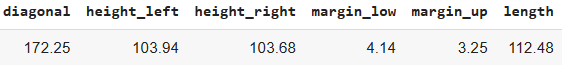
<!-- 1412 -->

In [118]:
import numpy as np

In [119]:
df = pd.read_csv("deteksi_uang_palsu.csv")
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


##Membuat Tabel Jarak

In [120]:
#Buat dataframe dari data baru
data_baru = pd.DataFrame({'diagonal': [172.25],
                         'height_left': [103.94],
                         'height_right': [103.68],
                         'margin_low': [4.14],
                         'margin_up': [3.25],
                         'length': [112.48]})

#Menghitung jarak setiap baris dataframe utama dengan dataframe data baru
df['distance'] = np.sqrt(
    (df['diagonal'] - data_baru['diagonal'].values[0])**2
    + (df['height_left'] - data_baru['height_left'].values[0])**2
    + (df['height_right'] - data_baru['height_right'].values[0])**2
    + (df['margin_low'] - data_baru['margin_low'].values[0])**2
    + (df['margin_up'] - data_baru['margin_up'].values[0])**2
    + (df['length'] - data_baru['length'].values[0])**2
)

#Menampilkan tabel jarak
print(df['distance'])

0    0.671267
1    1.458321
2    0.834626
3    0.910934
4    1.312593
5    2.421281
6    1.741896
7    1.113463
8    1.722034
9    1.738217
Name: distance, dtype: float64


##Menambahkan kolom jarak

In [121]:
#Set pandas untuk menampilkan seluruh kolom dibaris yang sesuai
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

print(df)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
1        True    171.66       103.68        103.41        4.35       3.33  113.74  1.458321
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934
4        True    171.79       104.57        104.04        4.26       3.15  113.46  1.312593
5       False    172.00       104.23        104.52        5.76       3.37  110.94  2.421281
6       False    171.56       104.03        103.93        5.47       3.50  111.67  1.741896
7       False    171.90       104.33        104.40        4.70       3.31  112.12  1.113463
8       False    171.84       104.06        104.10        4.87       3.25  111.04  1.722034
9       False    172.11       104.14        104.15        4.84       3.28  110.9

##Mengurutkan data dari yang terkecil ke yang terbesar

In [122]:
#Mengurutkan data dari kecil ke besar
sort_data = df.sort_values('distance')

#Menentukan nilai k
k = int(np.sqrt(len(df)))

#Menentukan data terdekat
data_trdkt = sort_data.head(k)

# Menampilkan data terdekat
print(data_trdkt)

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  length  distance
0        True    172.06       104.24        103.66        4.24       3.10  113.02  0.671267
2        True    172.23       104.00        103.35        4.43       2.95  113.12  0.834626
3        True    172.07       104.21        103.82        4.29       3.35  113.30  0.910934


##Menentukan hasil prediksi berdasarkan label terbanyak

In [123]:
#Impor library sklearn
from sklearn.neighbors import KNeighborsClassifier

#Split data menjadi data training dan data testing
X_train = df.drop(columns=['is_genuine','distance'],axis=1)
y_train = df['is_genuine']

#Inisiasi data baru menjadi data tes
test_data = data_baru

#Buat variabel knn yang berisikan algoritma KNN dengan nilai K = akar 2 dari banyak data
knn = KNeighborsClassifier(n_neighbors=k)

#data training
knn.fit(X_train, y_train)

#Prediksi hasil
prediksi = knn.predict(test_data)
print("Berdasarkan penggunaan library sklearn, hasil prediksinya adalah : "+ ' '.join(map(str, prediksi)))

Berdasarkan penggunaan library sklearn, hasil prediksinya adalah : True


#(3) Analisis

> Nama : Christina Febriyanti Tobing

> Nim : 2109116044

Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

Tema : Pendidikan

Judul Data : Student Graduation

Sumber : https://www.kaggle.com/datasets/permanaraga/student-graduation

##Business Understanding

Dataset Student Graduation merupakan sekumpulan data informasi mengenai mahasiswa yang telah lulus.Dataset ini bertujuan untuk mengetahui data dari tiap mahasiswa yang telah lulus, seperti nama, jenis kelamin, status mahasiswa, umur, status nikah, nilai IPS selama berukuliah, nilai IPK, dan status kelulusan,\.


##Data Understanding

###Collect Initial Data

Sumber Data : https://www.kaggle.com/datasets/permanaraga/student-graduation

###Describe Data

1. Nama : Nama mahasiswa yang dikaji
2. Jenis Kelamin : Gender dari mahasiswa yang dikaji
3. Status Mahasiswa : Status pekerjaan dari mahasiswa yang dikaji
4. Umur : Usia dari mahasiswa yang dikaji
5. Status Nikah : Status pernikahan dari mahasiswa yang dikaji
6. IPS 1 : Nilai IP semester 1 dari mahasiswa yang dikaji
7. IPS 2 : Nilai IP semester 2 dari mahasiswa yang dikaji
8. IPS 3 : Nilai IP semester 3 dari mahasiswa yang dikaji
9. IPS 4 : Nilai IP semester 4 dari mahasiswa yang dikaji
10. IPS 5 : Nilai IP semester 5 dari mahasiswa yang dikaji
11. IPS 6 : Nilai IP semester 6 dari mahasiswa yang dikaji
12. IPS 7 : Nilai IP semester 7 dari mahasiswa yang dikaji
13. IPS 8 : Nilai IP semester 8 dari mahasiswa yang dikaji
14. IPK : Nilai IPK dari mahasiswa yang dikaji
15. Status Kelulusan : Status kelulusan dari mahasiswa yang dikaji

In [124]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

In [125]:
df = pd.read_csv('student.csv')
df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [126]:
df.head()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT


In [127]:
df.tail()

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT
378,DINDU SETYO WICAKSONO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,3.10,3.06,3.00,3.23,2.79,3.00,2.41,3.0,2.16,TEPAT


In [128]:
df1 = df[df['JENIS KELAMIN'] == 'PEREMPUAN'] 

# Menampilkan hasil filter
print(df1)

                            NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR   STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  IPK  STATUS KELULUSAN
0                 ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0  3.07        TERLAMBAT
1        DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0  3.17        TERLAMBAT
2             MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0  3.54        TERLAMBAT
3                  NANIK SUSANTI     PEREMPUAN        MAHASISWA    27  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0  3.41        TERLAMBAT
4              RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0  3.09        TERLAMBAT
..              

In [129]:
df2 = df[df['STATUS MAHASISWA'] == 'BEKERJA'] 

# Menampilkan hasil filter
print(df2)

                     NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR   STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  IPK  STATUS KELULUSAN
0          ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03   0.00  3.07        TERLAMBAT
2      MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73   0.00  3.54        TERLAMBAT
4       RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08   0.00  3.09        TERLAMBAT
5               SUHARYONO   LAKI - LAKI          BEKERJA    27  BELUM MENIKAH   2.95   2.82   3.09   3.10   2.78   3.16   3.23   0.00  3.07        TERLAMBAT
8       HENDRIK MULIYANTO     PEREMPUAN          BEKERJA    25        MENIKAH   3.60   3.54   3.52   3.39   3.52   3.68   3.15   0.00  3.40        TERLAMBAT
..                    ...           ...              ...  

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [131]:
df.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [132]:
df.select_dtypes(include=np.number)

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
0,28,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07
1,32,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17
2,29,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54
3,27,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41
4,29,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09
...,...,...,...,...,...,...,...,...,...,...
374,23,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99
375,23,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97
376,23,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03
377,23,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16


In [133]:
def tampil(kolom):
  dfnum = df[kolom]

  print("Nilai minimum         :", dfnum.min())
  print("Nilai maksimum        :", dfnum.max())

In [134]:
tampil("UMUR")

Nilai minimum         : 22
Nilai maksimum        : 50


In [136]:
tampil("IPK ")

Nilai minimum         : 0.87
Nilai maksimum        : 3.85


###Explore Data

####Visualisasi Comparison

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

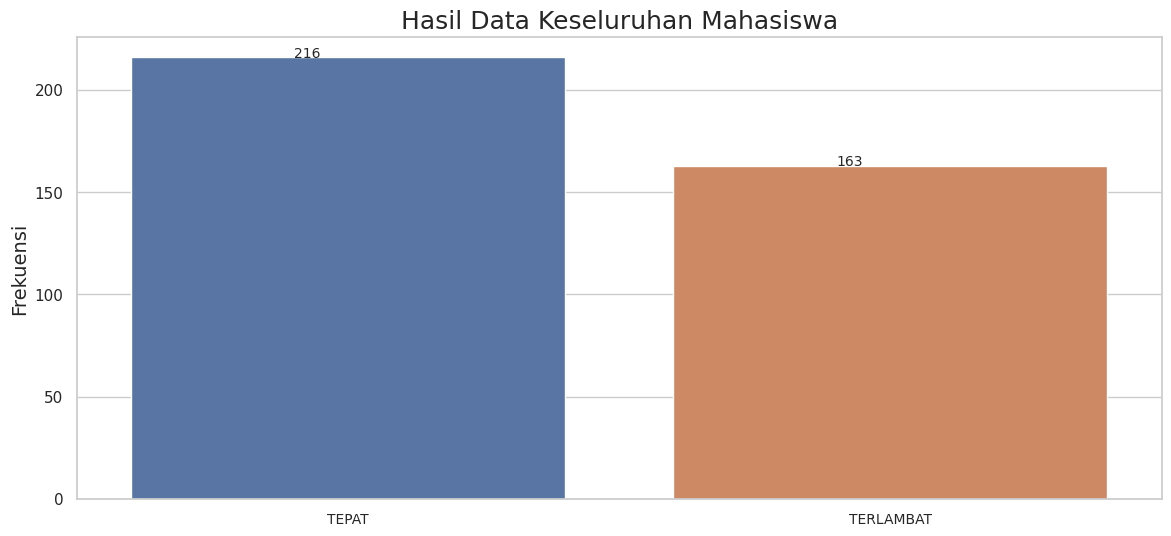

In [145]:
fig, ax = plt.subplots(figsize = (14, 6))
max_width = 13

index = df['STATUS KELULUSAN'].fillna('NaN').value_counts().index[0:4]
count = df['STATUS KELULUSAN'].fillna('NaN').value_counts()[0:4]
sns.barplot(x = index, y = count, order = index)
ax.set_title('Hasil Data Keseluruhan Mahasiswa', fontsize = 18)
ax.set_xticklabels((textwrap.fill(x, max_width) for x in index), fontsize = 10)
for i, count in enumerate(count):
    ax.text(x=i-0.1 , y =count+0 , s=f"{count}" , fontdict=dict(fontsize=10))
ax.set_ylabel('Frekuensi', fontsize = 14)
ax.set_ylim(0, df['STATUS KELULUSAN'].fillna('NaN').value_counts()[0]+10)

plt.show()

####Visualisasi Distribution

<Axes: xlabel='UMUR', ylabel='Count'>

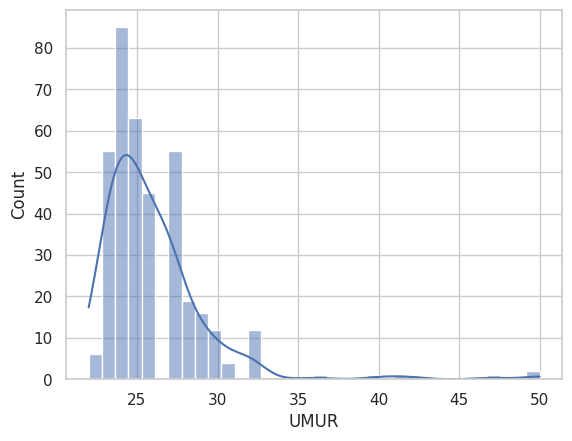

In [148]:
sns.histplot(data=df,x="UMUR",kde=True)

<Axes: xlabel='IPK ', ylabel='Count'>

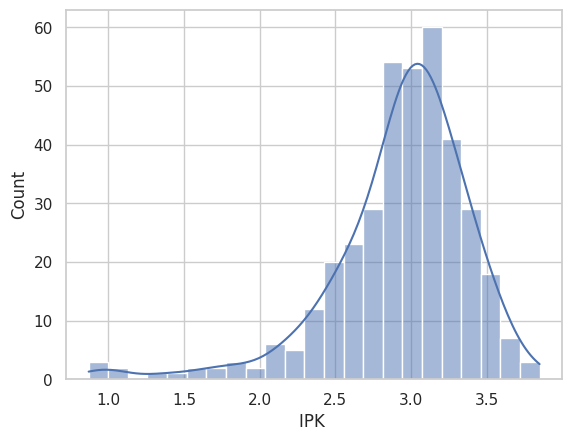

In [149]:
sns.histplot(data=df,x="IPK ",kde=True)

<Axes: xlabel='UMUR'>

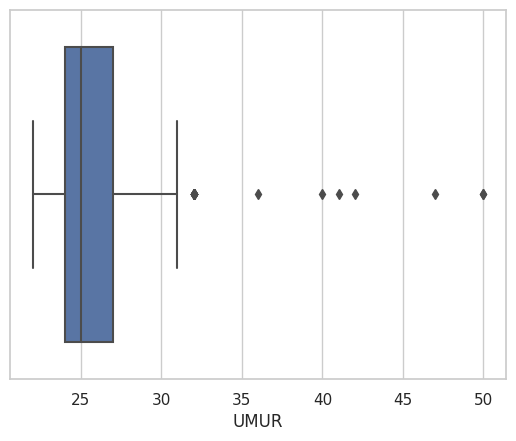

In [147]:
sns.boxplot(data=df,x='UMUR')

<Axes: xlabel='IPK '>

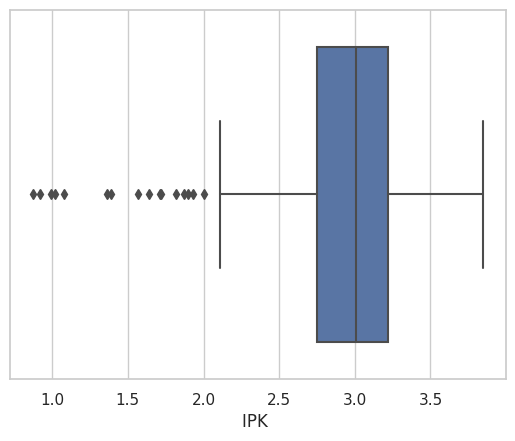

In [150]:
sns.boxplot(data=df,x='IPK ')

####Visualisasi Relationship

<Axes: xlabel='IPK ', ylabel='UMUR'>

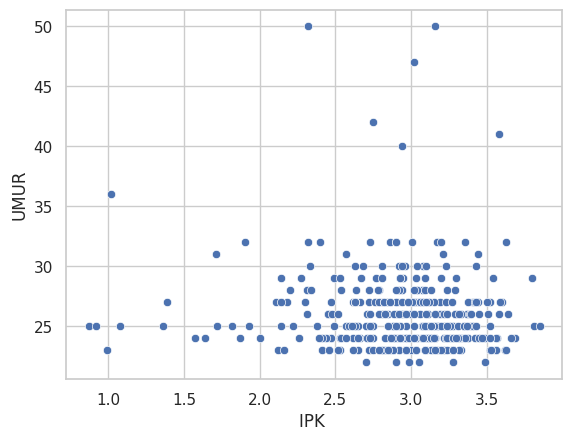

In [142]:
sns.scatterplot(data=df,x="IPK ",y="UMUR")

####Visualisasi Composition

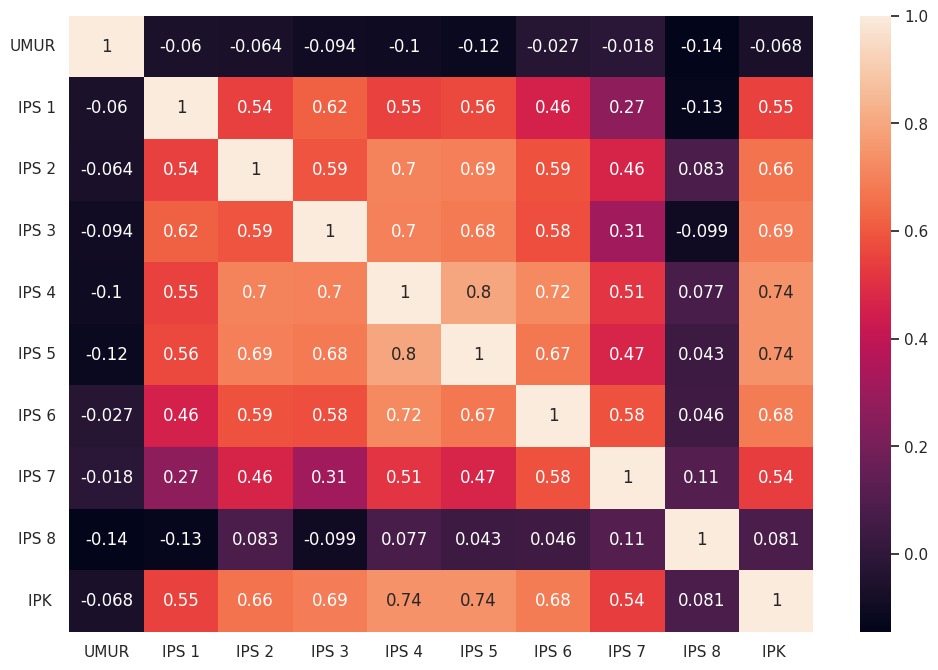

In [143]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

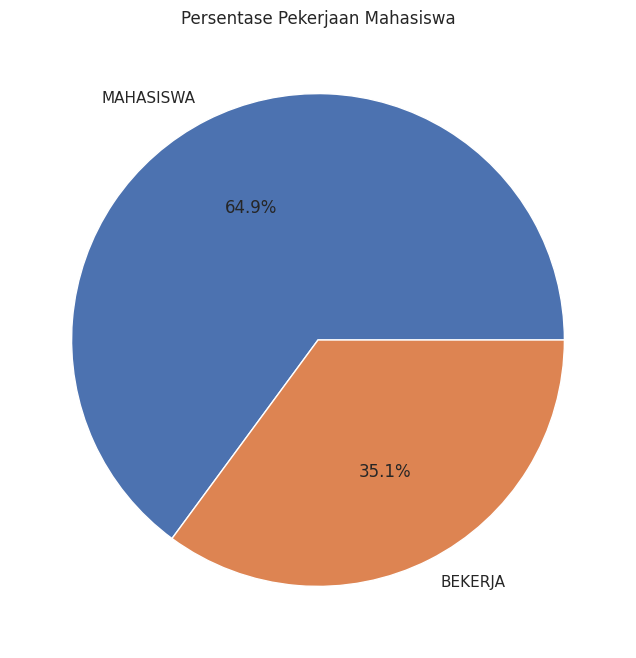

In [151]:
level_count = df['STATUS MAHASISWA'].value_counts()

#Create pie chart for Level tumor
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(level_count, labels=level_count.index, autopct='%1.1f%%')
ax.set_title('Persentase Pekerjaan Mahasiswa')
plt.show()

###Verify Data Quality

In [152]:
#Cek missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64


In [153]:
#Cek duplikasi
duplicate_rows = df.duplicated()
print("Jumlah Duplikasi: ", duplicate_rows.sum())

Jumlah Duplikasi:  0


In [154]:
#Cek outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

Outliers:
 IPK                 16
IPS 1                5
IPS 2               10
IPS 3                6
IPS 4               15
IPS 5                9
IPS 6               17
IPS 7               11
IPS 8                0
JENIS KELAMIN        0
NAMA                 0
STATUS KELULUSAN     0
STATUS MAHASISWA     0
STATUS NIKAH         0
UMUR                19
dtype: int64


<ipython-input-154-0754ed065965>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


In [155]:
#Cek tipe data
print("Data types:\n", df.dtypes)

Data types:
 NAMA                 object
JENIS KELAMIN        object
STATUS MAHASISWA     object
UMUR                  int64
STATUS NIKAH         object
IPS 1               float64
IPS 2               float64
IPS 3               float64
IPS 4               float64
IPS 5               float64
IPS 6               float64
IPS 7               float64
IPS 8               float64
IPK                 float64
STATUS KELULUSAN     object
dtype: object


##Data Preparation

###Select Data

In [156]:
import pandas as pd

In [157]:
df = pd.read_csv('student.csv')
df

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [158]:
#Menampikan hanya 2 Kolom
select_data = df[["UMUR", "JENIS KELAMIN"]]

print(select_data.head())

   UMUR JENIS KELAMIN
0    28     PEREMPUAN
1    32     PEREMPUAN
2    29     PEREMPUAN
3    27     PEREMPUAN
4    29     PEREMPUAN


In [159]:
#Menampikan hanya 3 Kolom
select_data = df[["UMUR", "JENIS KELAMIN", "STATUS MAHASISWA"]]

print(select_data.head())

   UMUR JENIS KELAMIN STATUS MAHASISWA
0    28     PEREMPUAN          BEKERJA
1    32     PEREMPUAN        MAHASISWA
2    29     PEREMPUAN          BEKERJA
3    27     PEREMPUAN        MAHASISWA
4    29     PEREMPUAN          BEKERJA


###Clean Data

In [160]:
df.isna().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               7
IPK                 3
STATUS KELULUSAN    0
dtype: int64

In [161]:
df.isna().sum() / len(df) * 100

NAMA                0.000000
JENIS KELAMIN       0.000000
STATUS MAHASISWA    0.000000
UMUR                0.000000
STATUS NIKAH        0.000000
IPS 1               0.000000
IPS 2               0.000000
IPS 3               0.000000
IPS 4               0.000000
IPS 5               0.000000
IPS 6               0.000000
IPS 7               0.000000
IPS 8               1.846966
IPK                 0.791557
STATUS KELULUSAN    0.000000
dtype: float64

In [162]:
df["IPS 8"] = df["IPS 8"].fillna(df["IPS 8"].mode()[0])
df["IPK "] = df["IPK "].fillna(df["IPK "].mode()[0])

In [163]:
df.isna().sum()

NAMA                0
JENIS KELAMIN       0
STATUS MAHASISWA    0
UMUR                0
STATUS NIKAH        0
IPS 1               0
IPS 2               0
IPS 3               0
IPS 4               0
IPS 5               0
IPS 6               0
IPS 7               0
IPS 8               0
IPK                 0
STATUS KELULUSAN    0
dtype: int64

In [164]:
df.isna().sum() / len(df) * 100

NAMA                0.0
JENIS KELAMIN       0.0
STATUS MAHASISWA    0.0
UMUR                0.0
STATUS NIKAH        0.0
IPS 1               0.0
IPS 2               0.0
IPS 3               0.0
IPS 4               0.0
IPS 5               0.0
IPS 6               0.0
IPS 7               0.0
IPS 8               0.0
IPK                 0.0
STATUS KELULUSAN    0.0
dtype: float64